# 1 - Perkenalan

Nama : Dheny Ramadianindra\
Batch : FTDS-010\
Dataset : Red Wine Quality\
Objective: 
- Mampu memahami konsep supervised learning dan unsupervised learning
- Mampu mempersiapkan data untuk digunakan dalam model supervised learning
- Mampu mengimplementasikan supervised learning dengan dataset yang baru
- Mampu melakukan evaluasi model
- Mampu melakukan model tuning
- Mampu melakukan model deployment

Diketahui bahwa data memiliki target kualitas wine dengan 6 variabel dari skor 3-8. Target diubah dengan definisi:
- Nilai >= 7 adalah wine dengan kualitas bagus (1)
- Nilai < 7 adalah wine dengan kualitas rendah (0)


Model deployment dapat diakses di https://dheny-ftds10-model-front.herokuapp.com/

# 2 - Import Libraries
Cell pertama pada notebook harus berisi dan hanya berisi semua library yang digunakan dalam project.

In [126]:
import pandas as pd
import numpy as np
import pickle
from sklearn.pipeline import make_pipeline
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor
from scipy import stats
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, ConfusionMatrixDisplay
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV
from imblearn.over_sampling import SMOTE

import warnings
warnings.filterwarnings('ignore')

# 3 - Data Loading
Bagian ini berisi proses penyiapan data sebelum dilakukan eksplorasi data lebih lanjut. Proses Data Loading dapat berupa memberi nama baru untuk setiap kolom, mengecek ukuran dataset, dll.\
Data dapat didownload dari https://www.kaggle.com/datasets/uciml/red-wine-quality-cortez-et-al-2009


In [2]:
# Load Dataset
data = pd.read_csv('winequality-red.csv')

# Duplicate Dataset
data_ori = data.copy()
data

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


Dari data diketahui memiliki 12 fitur dan targetnya adalah pada kolom 'quality' 

In [3]:
# Presentase Missing Value
(data.isnull().sum()/len(data))*100

fixed acidity           0.0
volatile acidity        0.0
citric acid             0.0
residual sugar          0.0
chlorides               0.0
free sulfur dioxide     0.0
total sulfur dioxide    0.0
density                 0.0
pH                      0.0
sulphates               0.0
alcohol                 0.0
quality                 0.0
dtype: float64

Terlihat dataset bersih tanpa adanya Missing Values.

# 4 - Exploratory Dataset
Bagian ini berisi eksplorasi data pada dataset diatas dengan menggunakan query, grouping, visualisasi sederhana, dan lain sebagainya.


In [4]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
fixed acidity,1599.0,8.319637,1.741096,4.60000,7.1000,7.90000,9.200000,15.90000
volatile acidity,1599.0,0.527821,0.179060,0.12000,0.3900,0.52000,0.640000,1.58000
citric acid,1599.0,0.270976,0.194801,0.00000,0.0900,0.26000,0.420000,1.00000
residual sugar,1599.0,2.538806,1.409928,0.90000,1.9000,2.20000,2.600000,15.50000
chlorides,1599.0,0.087467,0.047065,0.01200,0.0700,0.07900,0.090000,0.61100
free sulfur dioxide,1599.0,15.874922,10.460157,1.00000,7.0000,14.00000,21.000000,72.00000
total sulfur dioxide,1599.0,46.467792,32.895324,6.00000,22.0000,38.00000,62.000000,289.00000
density,1599.0,0.996747,0.001887,0.99007,0.9956,0.99675,0.997835,1.00369
pH,1599.0,3.311113,0.154386,2.74000,3.2100,3.31000,3.400000,4.01000
sulphates,1599.0,0.658149,0.169507,0.33000,0.5500,0.62000,0.730000,2.00000


Dari data describe diketahui nilai dengan jenis data numerik dari setiap kolomnya, disini saya melihat anomali pada kolom 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'pH', 'sulphates', 'alcohol' melihat dari nilai maksimal dan rata-ratanya memiliki perbedaan yang jauh, kemungkinan terdapat outliers pada data dan pada nilai density juga terlihat adanya keberagaman data jadi bisa di drop.

## Visualisasi Dataset

Melakukan visualisasi dari dataset yang ada sehingga interpretasi terhadap data akan lebih mudah.

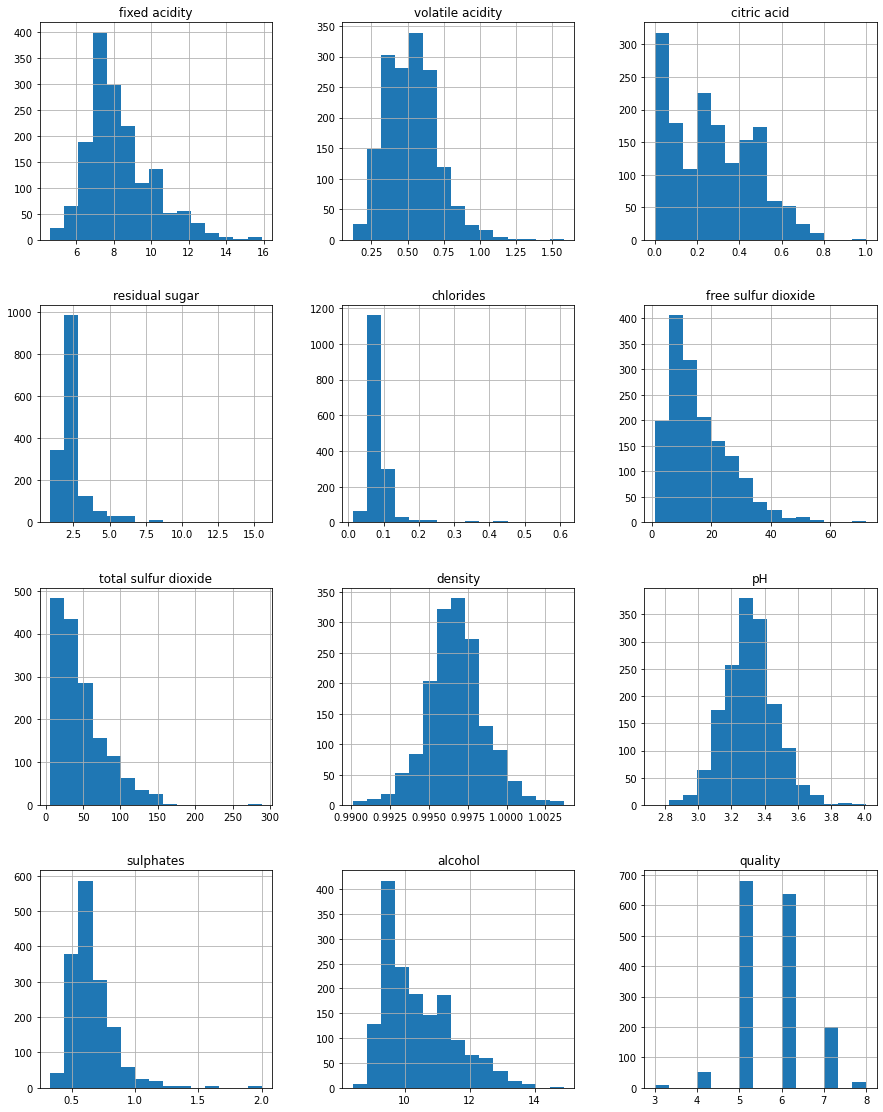

In [5]:
# Memvisualisasikan data numerik per kolomnya
num_cols = data.select_dtypes(exclude=['object']).columns.tolist()
data[num_cols].hist(bins=15, figsize=(15, 30), layout=(6, 3));

Dari histogram diatas diketahui bahwa dari keseluruhan data wine rata-rata memiliki data berupa skewed positive. Ada persebaran yang cukup menarik pada 'residual sugar' dan 'chlorides' karena terlihat tidak memiliki variasi nilai yang banyak, bisa disimpulkan dari hasil visualisasi kedua data ini tidak terlalu mempengaruhi hasil.

<AxesSubplot:xlabel='quality', ylabel='count'>

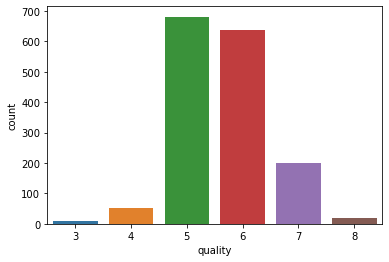

In [232]:
sns.countplot('quality', data=data)

Terlihat bahwa data didominasi oleh wine dengan kualitas 5 dan 6

<AxesSubplot:>

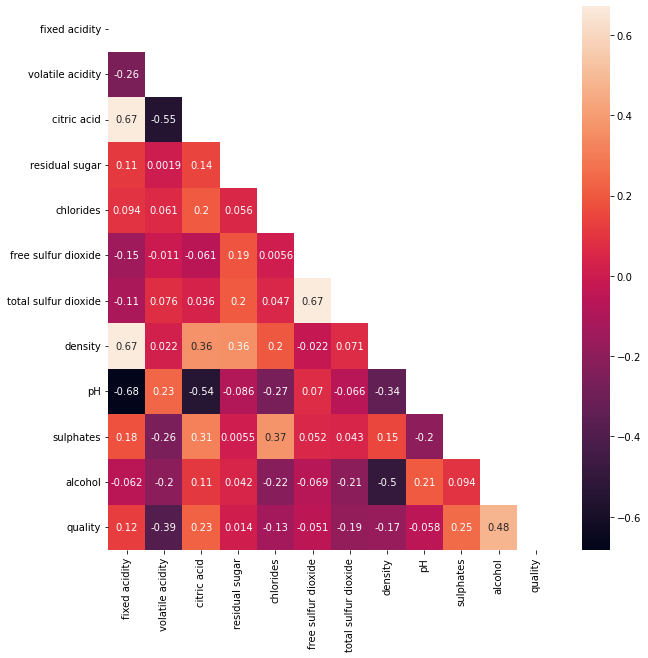

In [6]:
# Plotting heatmap
plt.figure(figsize=(10,10))
sns.heatmap(data.corr(),annot=True, mask=np.triu(data.corr()))

Berdasarkan korelasi heatmap, 'quality' sangat dipengaruhi oleh kadar alkohol dan beberapa penunjangnya adalah 'volatile acidity', 'citric acid', 'sulphates', 'pH', 'density', 'chloride'

<AxesSubplot:xlabel='quality', ylabel='alcohol'>

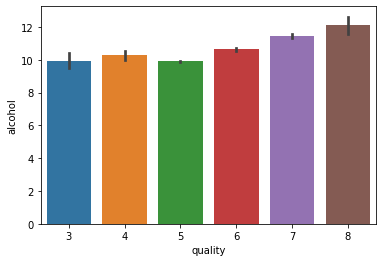

In [234]:
sns.barplot(x='quality', y='alcohol', data=data)

<AxesSubplot:xlabel='quality', ylabel='volatile acidity'>

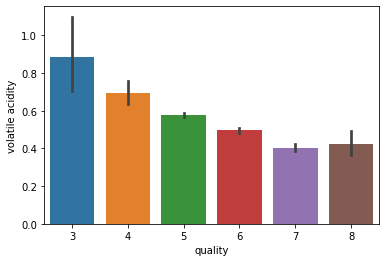

In [236]:
sns.barplot(x='quality', y='volatile acidity', data=data)

<AxesSubplot:xlabel='quality', ylabel='density'>

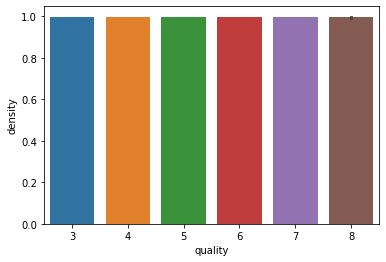

In [243]:
sns.barplot(x='quality', y='density', data=data)

<AxesSubplot:xlabel='quality', ylabel='pH'>

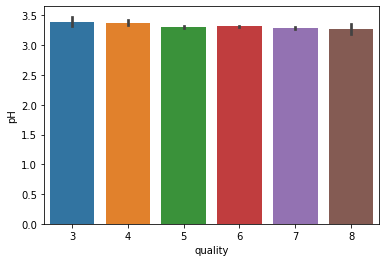

In [242]:
sns.barplot(x='quality', y='pH', data=data)

<AxesSubplot:xlabel='quality', ylabel='sulphates'>

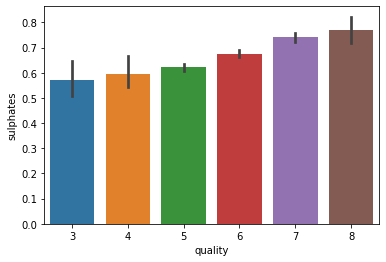

In [241]:
sns.barplot(x='quality', y='sulphates', data=data)

<AxesSubplot:xlabel='quality', ylabel='chlorides'>

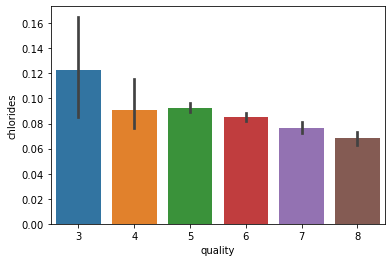

In [239]:
sns.barplot(x='quality', y='chlorides', data=data)

<AxesSubplot:xlabel='quality', ylabel='citric acid'>

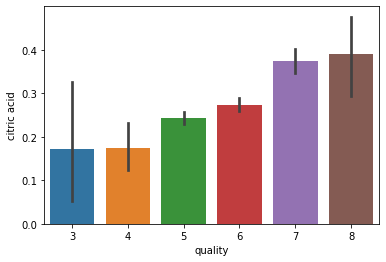

In [237]:
sns.barplot(x='quality', y='citric acid', data=data)

Setelah dilakukan visualisasi, 'quality' ternyata dipengaruhi oleh fitur dari kadar 'alcohol', 'volatile acidity', 'citric acid', 'sulphates', 'chloride' tapi pH dan density terlihat tidak ada perbedaan signifikan, tapi mendasari bahwa kadar pH dalam kandungan air memiliki pengaruh terhadap kualitas minuman, saya akan keep fitur pH.

# 5 - Data Preprocessing

Bagian ini berisi proses penyiapan data untuk proses pelatihan model, seperti pembagian data menjadi train-dev-test, transformasi data (normalisasi, encoding, dll.), dan proses-proses lain yang dibutuhkan.

## Handling Outlier

In [4]:
# Membuat definisi untuk Histogram dan boxplot
def diagnostic_plots(df, variable):
    # Define figure size
    plt.figure(figsize=(16, 4))

    # Histogram
    plt.subplot(1, 2, 1)
    sns.histplot(df[variable], bins=30)
    plt.title('Histogram')

    # Boxplot
    plt.subplot(1, 2, 2)
    sns.boxplot(y=df[variable])
    plt.title('Boxplot')

    plt.show()

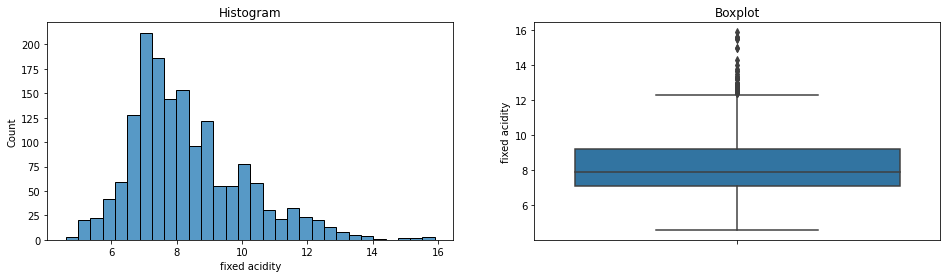


Skewness Value :  0.9827514413284587



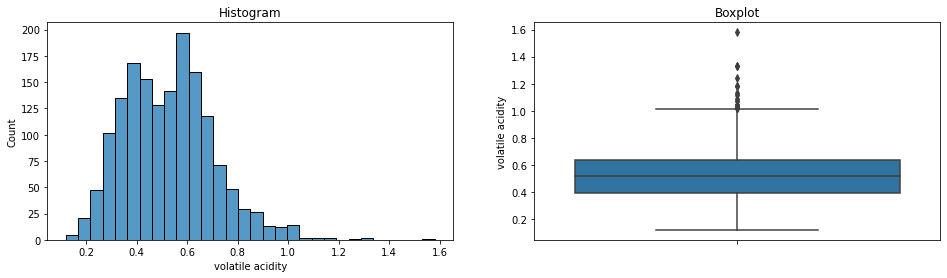


Skewness Value :  0.6715925723840199



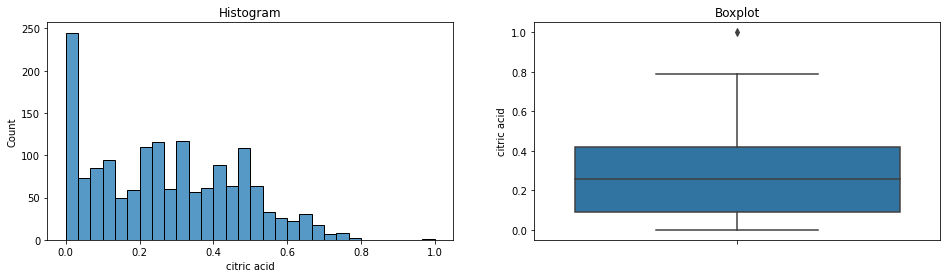


Skewness Value :  0.3183372952546368



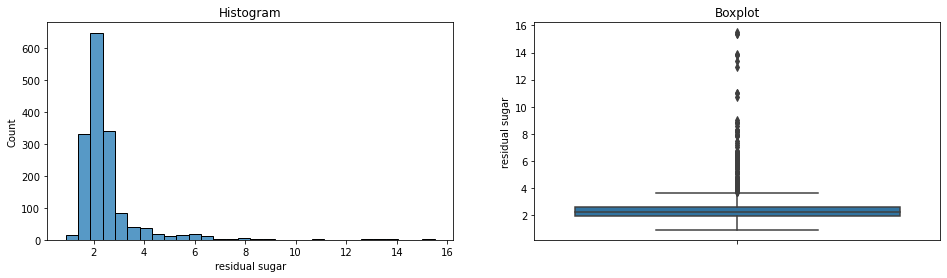


Skewness Value :  4.54065542590319



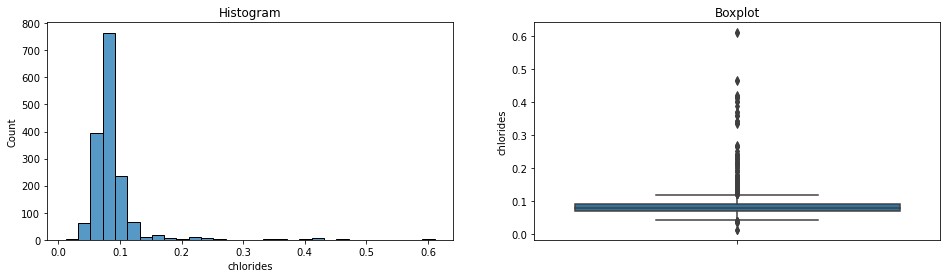


Skewness Value :  5.680346571971722



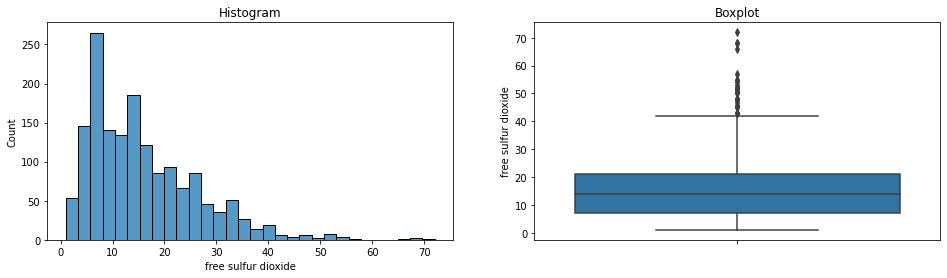


Skewness Value :  1.250567293314441



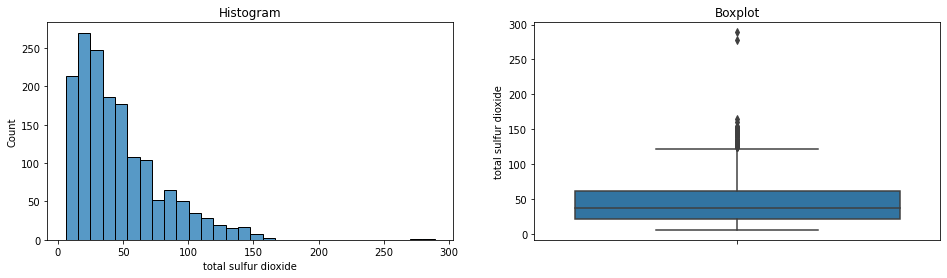


Skewness Value :  1.515531257594554



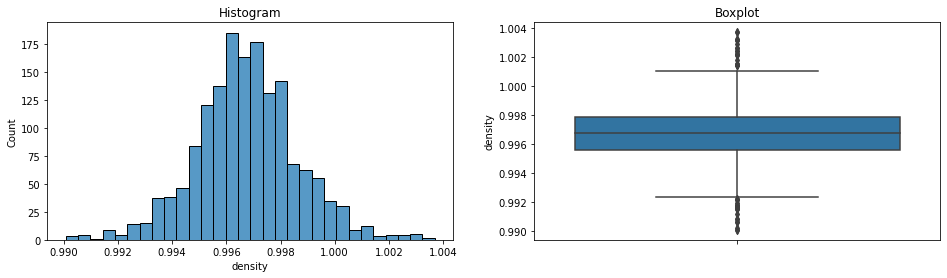


Skewness Value :  0.07128766294927483



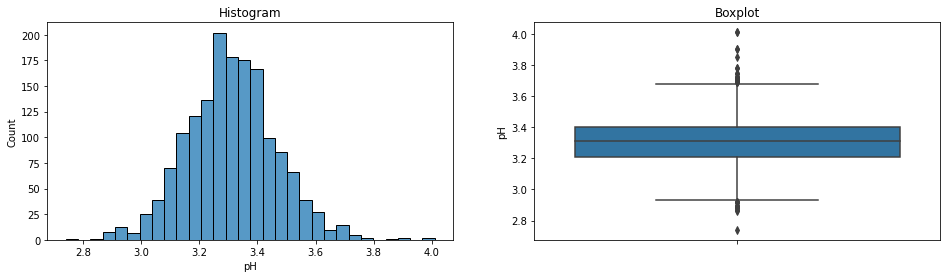


Skewness Value :  0.19368349811284427



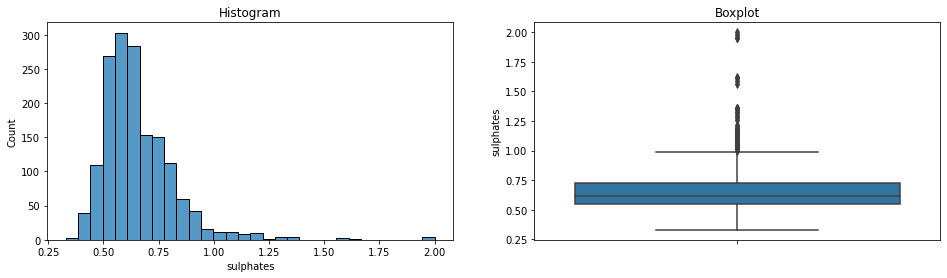


Skewness Value :  2.4286723536602945



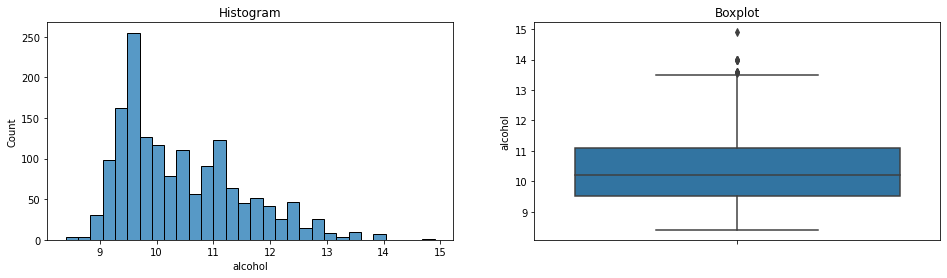


Skewness Value :  0.8608288068888538



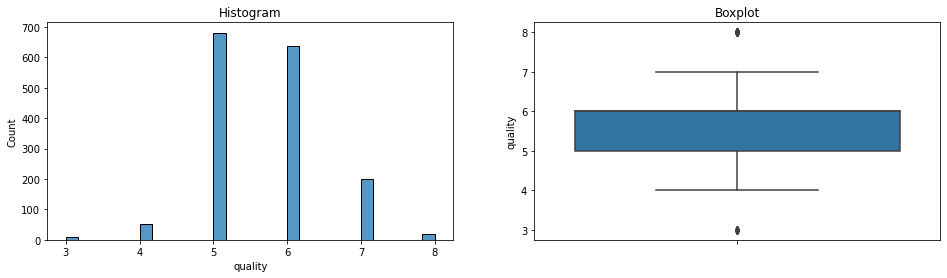


Skewness Value :  0.21780157547366327



In [5]:
kolom = data.columns

for i in kolom:
    diagnostic_plots(data, i)
    print('\nSkewness Value : ', data[i].skew())
    print('')

Terlihat semua skewed kanan, maka dilakukan metode IQR 1.5

In [6]:
# Definisi menggunakan metode IQR
def find_skewed_boundaries(df, variable, distance):
    IQR = df[variable].quantile(0.75) - df[variable].quantile(0.25)

    lower_boundary = df[variable].quantile(0.25) - (IQR * distance)
    upper_boundary = df[variable].quantile(0.75) + (IQR * distance)

    return upper_boundary, lower_boundary

In [7]:
# menggunakan metode IQR 1.5

for i in kolom:
    upper_boundary, lower_boundary = find_skewed_boundaries(data, i, 1.5)

    print(i,'- upper limit : ', upper_boundary)
    print(i,'- lower limit : ', lower_boundary, '\n')

fixed acidity - upper limit :  12.349999999999998
fixed acidity - lower limit :  3.95 

volatile acidity - upper limit :  1.0150000000000001
volatile acidity - lower limit :  0.015000000000000013 

citric acid - upper limit :  0.9149999999999999
citric acid - lower limit :  -0.4049999999999999 

residual sugar - upper limit :  3.6500000000000004
residual sugar - lower limit :  0.8499999999999996 

chlorides - upper limit :  0.11999999999999998
chlorides - lower limit :  0.04000000000000002 

free sulfur dioxide - upper limit :  42.0
free sulfur dioxide - lower limit :  -14.0 

total sulfur dioxide - upper limit :  122.0
total sulfur dioxide - lower limit :  -38.0 

density - upper limit :  1.0011875
density - lower limit :  0.9922475000000001 

pH - upper limit :  3.6849999999999996
pH - lower limit :  2.925 

sulphates - upper limit :  0.9999999999999999
sulphates - lower limit :  0.28000000000000014 

alcohol - upper limit :  13.5
alcohol - lower limit :  7.1000000000000005 

quality

In [8]:
# Menampilkan presentase outliers
for i in kolom:
    upper_boundary, lower_boundary = find_skewed_boundaries(data, i, 1.5)
    print('Total data : {}'.format(len(data)))
    print('Total Outlier',i, ': {}'.format(len(data[data[i] > upper_boundary])))
    print('Presentase : {}'.format(len(data[data[i] > upper_boundary])/len(data) * 100))
    print('')

Total data : 1599
Total Outlier fixed acidity : 49
Presentase : 3.0644152595372107

Total data : 1599
Total Outlier volatile acidity : 19
Presentase : 1.188242651657286

Total data : 1599
Total Outlier citric acid : 1
Presentase : 0.06253908692933083

Total data : 1599
Total Outlier residual sugar : 155
Presentase : 9.693558474046279

Total data : 1599
Total Outlier chlorides : 103
Presentase : 6.441525953721075

Total data : 1599
Total Outlier free sulfur dioxide : 30
Presentase : 1.876172607879925

Total data : 1599
Total Outlier total sulfur dioxide : 55
Presentase : 3.4396497811131956

Total data : 1599
Total Outlier density : 24
Presentase : 1.5009380863039399

Total data : 1599
Total Outlier pH : 21
Presentase : 1.3133208255159476

Total data : 1599
Total Outlier sulphates : 59
Presentase : 3.6898061288305186

Total data : 1599
Total Outlier alcohol : 13
Presentase : 0.8130081300813009

Total data : 1599
Total Outlier quality : 18
Presentase : 1.125703564727955



Menghilangkan Outliers pada 'fixed acidity','volatile acidity','citric acid','free sulfur dioxide','total sulfur dioxide','density','pH','sulphates','alcohol', karena memiliki presentase kurang dari 5% dari data jadi sekiranya aman untuk di handling 

In [9]:
upper_boundary1, lower_boundary1 = find_skewed_boundaries(data, 'fixed acidity', 1.5)
upper_boundary2, lower_boundary2 = find_skewed_boundaries(data, 'volatile acidity', 1.5)
upper_boundary3, lower_boundary3 = find_skewed_boundaries(data, 'citric acid', 1.5)
upper_boundary4, lower_boundary4 = find_skewed_boundaries(data, 'free sulfur dioxide', 1.5)
upper_boundary5, lower_boundary5 = find_skewed_boundaries(data, 'total sulfur dioxide', 1.5)
upper_boundary6, lower_boundary6 = find_skewed_boundaries(data, 'density', 1.5)
upper_boundary7, lower_boundary7 = find_skewed_boundaries(data, 'pH', 1.5)
upper_boundary8, lower_boundary8 = find_skewed_boundaries(data, 'sulphates', 1.5)
upper_boundary9, lower_boundary9 = find_skewed_boundaries(data, 'alcohol', 1.5)

outliers1 = np.where(data['fixed acidity'] > upper_boundary1, True,
            np.where(data['fixed acidity'] < lower_boundary1, True, False))
outliers2 = np.where(data['volatile acidity'] > upper_boundary2, True,
            np.where(data['volatile acidity'] < lower_boundary2, True, False))
outliers3 = np.where(data['citric acid'] > upper_boundary3, True,
            np.where(data['citric acid'] < lower_boundary3, True, False))
outliers4 = np.where(data['free sulfur dioxide'] > upper_boundary4, True,
            np.where(data['free sulfur dioxide'] < lower_boundary4, True, False))
outliers5 = np.where(data['total sulfur dioxide'] > upper_boundary5, True,
            np.where(data['total sulfur dioxide'] < lower_boundary5, True, False))
outliers6 = np.where(data['density'] > upper_boundary6, True,
            np.where(data['density'] < lower_boundary6, True, False))
outliers7 = np.where(data['pH'] > upper_boundary7, True,
            np.where(data['pH'] < lower_boundary7, True, False))
outliers8 = np.where(data['sulphates'] > upper_boundary8, True,
            np.where(data['sulphates'] < lower_boundary8, True, False))
outliers9 = np.where(data['alcohol'] > upper_boundary9, True,
            np.where(data['alcohol'] < lower_boundary9, True, False))

df_trim = data.loc[~(outliers1 + outliers2 + outliers3 + outliers4 + outliers5 + outliers6 + outliers7 + outliers8 + outliers9)]
print('Size dataset - Before trimming : ', data.shape)
print('Size dataset - After trimming  : ', df_trim.shape)

Size dataset - Before trimming :  (1599, 12)
Size dataset - After trimming  :  (1360, 12)


## Handling Missing Values


In [10]:
# Check missing value
df_trim.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

Tidak ada missing value

In [11]:
df_trim

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


## VIF

In [12]:
#Cek Multicollinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif_data = pd.DataFrame()
vif_data['fitur'] = df_trim.columns
  
# Melakukan kalkulasi VIF pada setiap fitur
vif_data["VIF"] = [variance_inflation_factor(df_trim.values, i) for i in range(len(df_trim.columns))]

vif_data

,fitur,VIF
0,fixed acidity,96.161219
1,volatile acidity,21.202251
2,citric acid,8.989014
3,residual sugar,6.390664
4,chlorides,11.357548
5,free sulfur dioxide,6.954765
6,total sulfur dioxide,7.282139
7,density,1880.932232
8,pH,1350.178216
9,sulphates,39.631484


In [13]:
#Cek Multicollinearity
df=df_trim.drop(['quality','density','pH','alcohol','fixed acidity','residual sugar','sulphates'], axis=1)
vif_data = pd.DataFrame()
vif_data['fitur'] = df.columns
  
# Melakukan kalkulasi VIF pada setiap fitur
vif_data["VIF"] = [variance_inflation_factor(df.values, i) for i in range(len(df.columns))]

vif_data

,fitur,VIF
0,volatile acidity,7.574948
1,citric acid,2.885373
2,chlorides,9.214012
3,free sulfur dioxide,5.907156
4,total sulfur dioxide,6.148861


Setelah dilakukan VIF ternyata didapatkan fitur penunjang dengan skor di atas 10 yaitu 'density', 'pH', 'fixed acidity', 'alcohol', 'sulphates', dan 'residual sugar'. Dari gabungan hasil interpretasi diatas, saya akan melakukan model dengan menggunakan fitur yaitu 'volatile acidity', 'citric acid', 'chlorides', 'pH', 'fixed acidity', 'sulphates', 'alcohol'

In [17]:
# Melakukan drop fitur yang tidak dipakai
df=df_trim.drop(df_trim.columns.difference(['quality','volatile acidity', 'citric acid', 'chlorides', 'pH', 'fixed acidity', 'sulphates', 'alcohol']), axis=1)
df.shape

(1360, 8)

Diketahui bahwa kualitas memiliki skor 3-8, akan saya definisikan dengan skor diatas 7 adalah nilai dengan kualitas wine yang baik dan skor dibawah 7 adalah kualitas wine kurang baik

In [18]:
kualitas = df['quality'].apply(lambda y_value: 1 if y_value >=7 else 0)
df=df.drop('quality', axis=1)
df.shape

(1360, 7)

In [19]:
df['quality'] = kualitas
df

,fixed acidity,volatile acidity,citric acid,chlorides,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,0.076,3.51,0.56,9.4,0
1,7.8,0.880,0.00,0.098,3.20,0.68,9.8,0
2,7.8,0.760,0.04,0.092,3.26,0.65,9.8,0
3,11.2,0.280,0.56,0.075,3.16,0.58,9.8,0
4,7.4,0.700,0.00,0.076,3.51,0.56,9.4,0
...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,0.090,3.45,0.58,10.5,0
1595,5.9,0.550,0.10,0.062,3.52,0.76,11.2,0
1596,6.3,0.510,0.13,0.076,3.42,0.75,11.0,0
1597,5.9,0.645,0.12,0.075,3.57,0.71,10.2,0


<AxesSubplot:xlabel='quality', ylabel='count'>

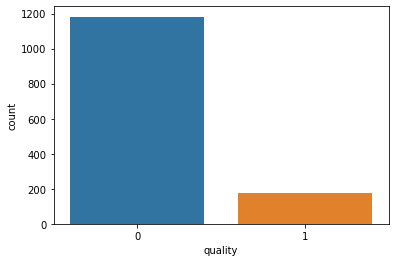

In [20]:
sns.countplot(data=df, x='quality')

Terlihat ternyata data imbalance

## Data Inference

In [170]:
# Membuat data inference
df_inf = df.sample(10, random_state=17)
df_inf

,fixed acidity,volatile acidity,citric acid,chlorides,pH,sulphates,alcohol,quality
537,8.1,0.825,0.24,0.084,3.37,0.77,10.700000,0
1057,7.6,0.420,0.25,0.104,3.15,0.57,9.100000,0
1362,11.6,0.475,0.40,0.091,3.07,0.65,10.033333,0
132,5.6,0.500,0.09,0.049,3.63,0.63,13.000000,0
654,8.6,0.470,0.47,0.074,3.08,0.46,9.500000,0
128,8.0,0.590,0.16,0.065,3.42,0.92,10.500000,1
1499,6.9,0.740,0.03,0.054,3.45,0.63,11.500000,0
1012,7.7,1.005,0.15,0.102,3.23,0.48,10.000000,0
444,5.3,0.570,0.01,0.054,3.57,0.84,12.500000,1
940,9.6,0.330,0.52,0.074,3.36,0.76,12.400000,1


In [171]:
# Remove Inference-Set from Dataset
df_train_test = df.drop(df_inf.index)

In [172]:
# Reset Index
df_train_test.reset_index(drop=True, inplace=True)
df_inf.reset_index(drop=True, inplace=True)
df_train_test

,fixed acidity,volatile acidity,citric acid,chlorides,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,0.076,3.51,0.56,9.4,0
1,7.8,0.880,0.00,0.098,3.20,0.68,9.8,0
2,7.8,0.760,0.04,0.092,3.26,0.65,9.8,0
3,11.2,0.280,0.56,0.075,3.16,0.58,9.8,0
4,7.4,0.700,0.00,0.076,3.51,0.56,9.4,0
...,...,...,...,...,...,...,...,...
1345,6.2,0.600,0.08,0.090,3.45,0.58,10.5,0
1346,5.9,0.550,0.10,0.062,3.52,0.76,11.2,0
1347,6.3,0.510,0.13,0.076,3.42,0.75,11.0,0
1348,5.9,0.645,0.12,0.075,3.57,0.71,10.2,0


In [173]:
# Split between train-set and test-set
X = df_train_test.drop('quality', axis=1)
y = df_train_test['quality']
X

,fixed acidity,volatile acidity,citric acid,chlorides,pH,sulphates,alcohol
0,7.4,0.700,0.00,0.076,3.51,0.56,9.4
1,7.8,0.880,0.00,0.098,3.20,0.68,9.8
2,7.8,0.760,0.04,0.092,3.26,0.65,9.8
3,11.2,0.280,0.56,0.075,3.16,0.58,9.8
4,7.4,0.700,0.00,0.076,3.51,0.56,9.4
...,...,...,...,...,...,...,...
1345,6.2,0.600,0.08,0.090,3.45,0.58,10.5
1346,5.9,0.550,0.10,0.062,3.52,0.76,11.2
1347,6.3,0.510,0.13,0.076,3.42,0.75,11.0
1348,5.9,0.645,0.12,0.075,3.57,0.71,10.2


In [174]:
# Split between train-set and test-set imbalance dataset
from sklearn.model_selection import train_test_split

X_train_imbalanced, X_test, y_train_imbalanced, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=17)
print('Train Size: ', X_train_imbalanced.shape)
print('Test Size: ',X_test.shape)

Train Size:  (945, 7)
Test Size:  (405, 7)


## Feature Scalling

In [175]:
# Feature Scaling 

scaler = MinMaxScaler()
scaler.fit(X_train_imbalanced)

X_train_scaled = scaler.transform(X_train_imbalanced)
X_test_scaled = scaler.transform(X_test)

X_train_scaled

array([[0.375     , 0.35955056, 0.35897436, ..., 0.37837838, 0.51515152,
        0.2       ],
       [0.61111111, 0.30337079, 0.52564103, ..., 0.47297297, 0.72727273,
        0.5       ],
       [0.36111111, 0.49438202, 0.1025641 , ..., 0.40540541, 0.5       ,
        0.24      ],
       ...,
       [0.30555556, 0.2752809 , 0.62820513, ..., 0.56756757, 0.68181818,
        0.52      ],
       [0.45833333, 0.49438202, 0.1025641 , ..., 0.25675676, 0.28787879,
        0.52      ],
       [0.27777778, 0.24719101, 0.35897436, ..., 0.68918919, 0.22727273,
        0.2       ]])

In [176]:
# Display as DataFrame

X_train_final_df = pd.DataFrame(X_train_scaled, columns=df_train_test.drop('quality', axis=1).columns)
X_train_final_df

,fixed acidity,volatile acidity,citric acid,chlorides,pH,sulphates,alcohol
0,0.375000,0.359551,0.358974,0.200658,0.378378,0.515152,0.20
1,0.611111,0.303371,0.525641,0.098684,0.472973,0.727273,0.50
2,0.361111,0.494382,0.102564,0.246711,0.405405,0.500000,0.24
3,0.666667,0.528090,0.089744,0.207237,0.500000,0.575758,0.28
4,0.583333,0.601124,0.333333,0.187500,0.418919,0.136364,0.24
...,...,...,...,...,...,...,...
940,1.000000,0.303371,0.807692,0.171053,0.297297,0.242424,0.22
941,0.305556,0.404494,0.410256,0.075658,0.486486,0.484848,0.32
942,0.305556,0.275281,0.628205,0.161184,0.567568,0.681818,0.52
943,0.458333,0.494382,0.102564,0.217105,0.256757,0.287879,0.52


# 6 - Model Definition
Bagian ini berisi cell untuk mendefinisikan model. Jelaskan alasan menggunakan suatu algoritma/model, hyperparameter yang dipakai, jenis penggunaan metrics yang dipakai, dan hal lain yang terkait dengan model.

In [177]:
# Training menggunakan Logistic Regression
model_log = LogisticRegression(random_state=17)

# Training menggunakan SVM
model_svm = SVC(random_state=88)

# Training menggunakan Decision Tree
model_dc = DecisionTreeClassifier(random_state=17)

# Training menggunakan Random Forest
model_rf = RandomForestClassifier(random_state=17)

# Training menggunakan KNN
model_knn = KNeighborsClassifier()

# Training menggunakan Naive Bayes
model_nb = GaussianNB()

# Training menggunakan Bagging Classifier
model_bc = BaggingClassifier(random_state=17)

# Training menggunakan Adaboost Classifier
model_ac = AdaBoostClassifier(random_state=17)


# 7 - Model Training
Cell pada bagian ini hanya berisi code untuk melatih model dan output yang dihasilkan. Lakukan beberapa kali proses training dengan hyperparameter yang berbeda untuk melihat hasil yang didapatkan. Analisis dan narasikan hasil ini pada bagian Model Evaluation.

In [178]:
# Train the Model

model_log.fit(X_train_scaled, y_train_imbalanced)
model_svm.fit(X_train_scaled, y_train_imbalanced)
model_dc.fit(X_train_scaled, y_train_imbalanced)
model_rf.fit(X_train_scaled, y_train_imbalanced)
model_knn.fit(X_train_scaled, y_train_imbalanced)
model_nb.fit(X_train_scaled, y_train_imbalanced)
model_bc.fit(X_train_scaled, y_train_imbalanced)
model_ac.fit(X_train_scaled, y_train_imbalanced)

AdaBoostClassifier(random_state=17)

# 8 - Model Evaluation
Pada bagian ini, dilakukan evaluasi model yang harus menunjukkan bagaimana performa model berdasarkan metrics yang dipilih. Hal ini harus dibuktikan dengan visualisasi tren performa dan/atau tingkat kesalahan model.

## Logistic Regression

In [179]:
# Cek Performa model Logistic Regression terhadap Train-Set dan Test-Set

y_pred_train_log = model_log.predict(X_train_scaled)
y_pred_test_log = model_log.predict(X_test_scaled)

print('Accuracy - Train Set  : ', accuracy_score(y_train_imbalanced, y_pred_train_log), '\n')
print('Accuracy - Test Set  : ', accuracy_score(y_test, y_pred_test_log), '\n')
print('Classification Report - Train Set : \n', classification_report(y_train_imbalanced, y_pred_train_log), '\n')
print('Classification Report - Test Set : \n', classification_report(y_test, y_pred_test_log))

Accuracy - Train Set  :  0.8888888888888888 

Accuracy - Test Set  :  0.8888888888888888 

Classification Report - Train Set : 
               precision    recall  f1-score   support

           0       0.89      0.99      0.94       823
           1       0.74      0.21      0.33       122

    accuracy                           0.89       945
   macro avg       0.82      0.60      0.64       945
weighted avg       0.87      0.89      0.86       945
 

Classification Report - Test Set : 
               precision    recall  f1-score   support

           0       0.90      0.99      0.94       352
           1       0.72      0.25      0.37        53

    accuracy                           0.89       405
   macro avg       0.81      0.62      0.65       405
weighted avg       0.87      0.89      0.86       405



## SVM

In [180]:
# Cek Performa model SVM terhadap Train-Set dan Test-Set

y_pred_train_svm = model_svm.predict(X_train_scaled)
y_pred_test_svm = model_svm.predict(X_test_scaled)

print('Accuracy - Train Set  : ', accuracy_score(y_train_imbalanced, y_pred_train_svm), '\n')
print('Accuracy - Test Set  : ', accuracy_score(y_test, y_pred_test_svm), '\n')
print('Classification Report - Train Set : \n', classification_report(y_train_imbalanced, y_pred_train_svm), '\n')
print('Classification Report - Test Set : \n', classification_report(y_test, y_pred_test_svm))

Accuracy - Train Set  :  0.8920634920634921 

Accuracy - Test Set  :  0.8814814814814815 

Classification Report - Train Set : 
               precision    recall  f1-score   support

           0       0.90      0.99      0.94       823
           1       0.79      0.22      0.35       122

    accuracy                           0.89       945
   macro avg       0.84      0.61      0.64       945
weighted avg       0.88      0.89      0.86       945
 

Classification Report - Test Set : 
               precision    recall  f1-score   support

           0       0.89      0.99      0.94       352
           1       0.67      0.19      0.29        53

    accuracy                           0.88       405
   macro avg       0.78      0.59      0.61       405
weighted avg       0.86      0.88      0.85       405



## Decision Tree

In [181]:
# Cek Performa model Decision Tree terhadap Train-Set dan Test-Set

y_pred_train_dc = model_dc.predict(X_train_scaled)
y_pred_test_dc = model_dc.predict(X_test_scaled)

print('Accuracy - Train Set  : ', accuracy_score(y_train_imbalanced, y_pred_train_dc), '\n')
print('Accuracy - Test Set  : ', accuracy_score(y_test, y_pred_test_dc), '\n')
print('Classification Report - Train Set : \n', classification_report(y_train_imbalanced, y_pred_train_dc), '\n')
print('Classification Report - Test Set : \n', classification_report(y_test, y_pred_test_dc))

Accuracy - Train Set  :  1.0 

Accuracy - Test Set  :  0.8592592592592593 

Classification Report - Train Set : 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       823
           1       1.00      1.00      1.00       122

    accuracy                           1.00       945
   macro avg       1.00      1.00      1.00       945
weighted avg       1.00      1.00      1.00       945
 

Classification Report - Test Set : 
               precision    recall  f1-score   support

           0       0.94      0.90      0.92       352
           1       0.47      0.60      0.53        53

    accuracy                           0.86       405
   macro avg       0.70      0.75      0.72       405
weighted avg       0.88      0.86      0.87       405



## Random Forest

In [182]:
# Cek Performa model Random Forest terhadap Train-Set dan Test-Set

y_pred_train_rf = model_rf.predict(X_train_scaled)
y_pred_test_rf = model_rf.predict(X_test_scaled)

print('Accuracy - Train Set  : ', accuracy_score(y_train_imbalanced, y_pred_train_rf), '\n')
print('Accuracy - Test Set  : ', accuracy_score(y_test, y_pred_test_rf), '\n')
print('Classification Report - Train Set : \n', classification_report(y_train_imbalanced, y_pred_train_rf), '\n')
print('Classification Report - Test Set : \n', classification_report(y_test, y_pred_test_rf))

Accuracy - Train Set  :  1.0 

Accuracy - Test Set  :  0.9209876543209876 

Classification Report - Train Set : 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       823
           1       1.00      1.00      1.00       122

    accuracy                           1.00       945
   macro avg       1.00      1.00      1.00       945
weighted avg       1.00      1.00      1.00       945
 

Classification Report - Test Set : 
               precision    recall  f1-score   support

           0       0.94      0.97      0.96       352
           1       0.77      0.57      0.65        53

    accuracy                           0.92       405
   macro avg       0.85      0.77      0.80       405
weighted avg       0.92      0.92      0.92       405



## KNN

In [183]:
# Cek Performa model KNN terhadap Train-Set dan Test-Set

y_pred_train_knn = model_knn.predict(X_train_scaled)
y_pred_test_knn = model_knn.predict(X_test_scaled)

print('Accuracy - Train Set  : ', accuracy_score(y_train_imbalanced, y_pred_train_knn), '\n')
print('Accuracy - Test Set  : ', accuracy_score(y_test, y_pred_test_knn), '\n')
print('Classification Report - Train Set : \n', classification_report(y_train_imbalanced, y_pred_train_knn), '\n')
print('Classification Report - Test Set : \n', classification_report(y_test, y_pred_test_knn))

Accuracy - Train Set  :  0.91005291005291 

Accuracy - Test Set  :  0.8765432098765432 

Classification Report - Train Set : 
               precision    recall  f1-score   support

           0       0.93      0.97      0.95       823
           1       0.71      0.51      0.59       122

    accuracy                           0.91       945
   macro avg       0.82      0.74      0.77       945
weighted avg       0.90      0.91      0.90       945
 

Classification Report - Test Set : 
               precision    recall  f1-score   support

           0       0.91      0.95      0.93       352
           1       0.54      0.38      0.44        53

    accuracy                           0.88       405
   macro avg       0.73      0.66      0.69       405
weighted avg       0.86      0.88      0.87       405



## Naive Bayes

In [184]:
# Cek Performa model Naive Bayes terhadap Train-Set dan Test-Set

y_pred_train_nb = model_nb.predict(X_train_scaled)
y_pred_test_nb = model_nb.predict(X_test_scaled)

print('Accuracy - Train Set  : ', accuracy_score(y_train_imbalanced, y_pred_train_nb), '\n')
print('Accuracy - Test Set  : ', accuracy_score(y_test, y_pred_test_nb), '\n')
print('Classification Report - Train Set : \n', classification_report(y_train_imbalanced, y_pred_train_nb), '\n')
print('Classification Report - Test Set : \n', classification_report(y_test, y_pred_test_nb))

Accuracy - Train Set  :  0.8656084656084656 

Accuracy - Test Set  :  0.8592592592592593 

Classification Report - Train Set : 
               precision    recall  f1-score   support

           0       0.95      0.89      0.92       823
           1       0.49      0.68      0.57       122

    accuracy                           0.87       945
   macro avg       0.72      0.79      0.74       945
weighted avg       0.89      0.87      0.87       945
 

Classification Report - Test Set : 
               precision    recall  f1-score   support

           0       0.94      0.89      0.92       352
           1       0.47      0.62      0.54        53

    accuracy                           0.86       405
   macro avg       0.71      0.76      0.73       405
weighted avg       0.88      0.86      0.87       405



## Bagging Classifier

In [185]:
# Cek Performa model Bagging Classifier terhadap Train-Set dan Test-Set

y_pred_train_bc = model_bc.predict(X_train_scaled)
y_pred_test_bc = model_bc.predict(X_test_scaled)

print('Accuracy - Train Set  : ', accuracy_score(y_train_imbalanced, y_pred_train_bc), '\n')
print('Accuracy - Test Set  : ', accuracy_score(y_test, y_pred_test_bc), '\n')
print('Classification Report - Train Set : \n', classification_report(y_train_imbalanced, y_pred_train_bc), '\n')
print('Classification Report - Test Set : \n', classification_report(y_test, y_pred_test_bc))

Accuracy - Train Set  :  0.9915343915343915 

Accuracy - Test Set  :  0.8839506172839506 

Classification Report - Train Set : 
               precision    recall  f1-score   support

           0       0.99      1.00      1.00       823
           1       0.98      0.95      0.97       122

    accuracy                           0.99       945
   macro avg       0.99      0.97      0.98       945
weighted avg       0.99      0.99      0.99       945
 

Classification Report - Test Set : 
               precision    recall  f1-score   support

           0       0.92      0.94      0.93       352
           1       0.57      0.49      0.53        53

    accuracy                           0.88       405
   macro avg       0.75      0.72      0.73       405
weighted avg       0.88      0.88      0.88       405



## Adaboost Classifier

In [186]:
# Cek Performa model Adaboost Classifier terhadap Train-Set dan Test-Set

y_pred_train_ac = model_ac.predict(X_train_scaled)
y_pred_test_ac = model_ac.predict(X_test_scaled)

print('Accuracy - Train Set  : ', accuracy_score(y_train_imbalanced, y_pred_train_ac), '\n')
print('Accuracy - Test Set  : ', accuracy_score(y_test, y_pred_test_ac), '\n')
print('Classification Report - Train Set : \n', classification_report(y_train_imbalanced, y_pred_train_ac), '\n')
print('Classification Report - Test Set : \n', classification_report(y_test, y_pred_test_ac))

Accuracy - Train Set  :  0.9227513227513228 

Accuracy - Test Set  :  0.8765432098765432 

Classification Report - Train Set : 
               precision    recall  f1-score   support

           0       0.94      0.98      0.96       823
           1       0.80      0.54      0.64       122

    accuracy                           0.92       945
   macro avg       0.87      0.76      0.80       945
weighted avg       0.92      0.92      0.92       945
 

Classification Report - Test Set : 
               precision    recall  f1-score   support

           0       0.91      0.95      0.93       352
           1       0.54      0.42      0.47        53

    accuracy                           0.88       405
   macro avg       0.73      0.68      0.70       405
weighted avg       0.87      0.88      0.87       405



In [187]:
# Menampilkan hasil Akurasi 
print('Accuracy - Train Set SVM : ', accuracy_score(y_train_imbalanced, y_pred_train_svm))
print('Accuracy - Test Set SVM : ', accuracy_score(y_test, y_pred_test_svm), '\n')
print('Accuracy - Train Set Decision Tree : ', accuracy_score(y_train_imbalanced, y_pred_train_dc))
print('Accuracy - Test Set Decision Tree : ', accuracy_score(y_test, y_pred_test_dc), '\n')
print('Accuracy - Train Set Bagging Classifier : ', accuracy_score(y_train_imbalanced, y_pred_train_bc))
print('Accuracy - Test Set Bagging Classifier : ', accuracy_score(y_test, y_pred_test_bc), '\n')
print('Accuracy - Train Set Random Forest : ', accuracy_score(y_train_imbalanced, y_pred_train_rf))
print('Accuracy - Test Set Random Forest : ', accuracy_score(y_test, y_pred_test_rf), '\n')
print('Accuracy - Train Set KNN : ', accuracy_score(y_train_imbalanced, y_pred_train_knn))
print('Accuracy - Test Set KNN : ', accuracy_score(y_test, y_pred_test_knn), '\n')
print('Accuracy - Train Set Naive Bayes : ', accuracy_score(y_train_imbalanced, y_pred_train_nb))
print('Accuracy - Test Set Naive Bayes : ', accuracy_score(y_test, y_pred_test_nb), '\n')
print('Accuracy - Train Set Adaboost : ', accuracy_score(y_train_imbalanced, y_pred_train_ac))
print('Accuracy - Test Set Adaboost : ', accuracy_score(y_test, y_pred_test_ac), '\n')
print('Accuracy - Train Set Logistic Regression : ', accuracy_score(y_train_imbalanced, y_pred_train_log))
print('Accuracy - Test Set Logistic Regression : ', accuracy_score(y_test, y_pred_test_log))

Accuracy - Train Set SVM :  0.8920634920634921
Accuracy - Test Set SVM :  0.8814814814814815 

Accuracy - Train Set Decision Tree :  1.0
Accuracy - Test Set Decision Tree :  0.8592592592592593 

Accuracy - Train Set Bagging Classifier :  0.9915343915343915
Accuracy - Test Set Bagging Classifier :  0.8839506172839506 

Accuracy - Train Set Random Forest :  1.0
Accuracy - Test Set Random Forest :  0.9209876543209876 

Accuracy - Train Set KNN :  0.91005291005291
Accuracy - Test Set KNN :  0.8765432098765432 

Accuracy - Train Set Naive Bayes :  0.8656084656084656
Accuracy - Test Set Naive Bayes :  0.8592592592592593 

Accuracy - Train Set Adaboost :  0.9227513227513228
Accuracy - Test Set Adaboost :  0.8765432098765432 

Accuracy - Train Set Logistic Regression :  0.8888888888888888
Accuracy - Test Set Logistic Regression :  0.8888888888888888


Terlihat bahwa dari Accuracy Score model Random Forest memiliki nilai test score terbaik sebesar 0.92

Cross Validation

In [188]:
# Cross Validation using `cross_val_score`

def cross(x):
    cv=cross_val_score(x, X_train_scaled, y_train_imbalanced, cv=3, scoring="accuracy")
    return cv

print('Logistic Regression')
print('Accuracy - All - Cross Validation  : ', cross(model_log))
print('Accuracy - Mean - Cross Validation : ', cross(model_log).mean())
print('Accuracy - Std - Cross Validation  : ', cross(model_log).std())
print('Accuracy - Range of Test-Set       : ', (cross(model_log).mean()-cross(model_log).std()) , '-', (cross(model_log).mean()+cross(model_log).std()),'\n')
print('SVM ')
print('Accuracy - All - Cross Validation  : ', cross(model_svm))
print('Accuracy - Mean - Cross Validation : ', cross(model_svm).mean())
print('Accuracy - Std - Cross Validation  : ', cross(model_svm).std())
print('Accuracy - Range of Test-Set       : ', (cross(model_svm).mean()-cross(model_svm).std()) , '-', (cross(model_svm).mean()+cross(model_svm).std()),'\n')
print('Decision Tree')
print('Accuracy - All - Cross Validation  : ', cross(model_dc))
print('Accuracy - Mean - Cross Validation : ', cross(model_dc).mean())
print('Accuracy - Std - Cross Validation  : ', cross(model_dc).std())
print('Accuracy - Range of Test-Set       : ', (cross(model_dc).mean()-cross(model_dc).std()) , '-', (cross(model_dc).mean()+cross(model_dc).std()),'\n')
print('Random Forest')
print('Accuracy - All - Cross Validation  : ', cross(model_rf))
print('Accuracy - Mean - Cross Validation : ', cross(model_rf).mean())
print('Accuracy - Std - Cross Validation  : ', cross(model_rf).std())
print('Accuracy - Range of Test-Set       : ', (cross(model_rf).mean()-cross(model_rf).std()) , '-', (cross(model_rf).mean()+cross(model_rf).std()),'\n')
print('KNN')
print('Accuracy - All - Cross Validation  : ', cross(model_knn))
print('Accuracy - Mean - Cross Validation : ', cross(model_knn).mean())
print('Accuracy - Std - Cross Validation  : ', cross(model_knn).std())
print('Accuracy - Range of Test-Set       : ', (cross(model_knn).mean()-cross(model_knn).std()) , '-', (cross(model_knn).mean()+cross(model_knn).std()),'\n')
print('Naive Bayes')
print('Accuracy - All - Cross Validation  : ', cross(model_nb))
print('Accuracy - Mean - Cross Validation : ', cross(model_nb).mean())
print('Accuracy - Std - Cross Validation  : ', cross(model_nb).std())
print('Accuracy - Range of Test-Set       : ', (cross(model_nb).mean()-cross(model_nb).std()) , '-', (cross(model_nb).mean()+cross(model_nb).std()),'\n')
print('Bagging Classifier')
print('Accuracy - All - Cross Validation  : ', cross(model_bc))
print('Accuracy - Mean - Cross Validation : ', cross(model_bc).mean())
print('Accuracy - Std - Cross Validation  : ', cross(model_bc).std())
print('Accuracy - Range of Test-Set       : ', (cross(model_bc).mean()-cross(model_bc).std()) , '-', (cross(model_bc).mean()+cross(model_bc).std()),'\n')
print('Adaboost Classifier')
print('Accuracy - All - Cross Validation  : ', cross(model_ac))
print('Accuracy - Mean - Cross Validation : ', cross(model_ac).mean())
print('Accuracy - Std - Cross Validation  : ', cross(model_ac).std())
print('Accuracy - Range of Test-Set       : ', (cross(model_ac).mean()-cross(model_ac).std()) , '-', (cross(model_ac).mean()+cross(model_ac).std()))


Logistic Regression
Accuracy - All - Cross Validation  :  [0.88571429 0.88571429 0.87936508]
Accuracy - Mean - Cross Validation :  0.8835978835978836
Accuracy - Std - Cross Validation  :  0.0029930445764509844
Accuracy - Range of Test-Set       :  0.8806048390214326 - 0.8865909281743346 

SVM 
Accuracy - All - Cross Validation  :  [0.88253968 0.88253968 0.87936508]
Accuracy - Mean - Cross Validation :  0.8814814814814814
Accuracy - Std - Cross Validation  :  0.001496522288225492
Accuracy - Range of Test-Set       :  0.8799849591932559 - 0.8829780037697069 

Decision Tree
Accuracy - All - Cross Validation  :  [0.84761905 0.85079365 0.8031746 ]
Accuracy - Mean - Cross Validation :  0.8338624338624339
Accuracy - Std - Cross Validation  :  0.021738241888014934
Accuracy - Range of Test-Set       :  0.8121241919744189 - 0.8556006757504488 

Random Forest
Accuracy - All - Cross Validation  :  [0.88888889 0.87936508 0.88253968]
Accuracy - Mean - Cross Validation :  0.8835978835978836
Accuracy 

Dari seluruh perbandingan dengan model diatas, saya memilih model Random Forest karena memiliki akurasi yang cukup bagus dan tidak overfitting dengan nilai cross validation 0.879-0.887. Saya akan membandingkan model dengan Random Forest dengan data yang sudah di balancing

## Handling Imbalance Data

In [189]:
# Split between train-set and test-set balance dataset
smote = SMOTE(k_neighbors=5, sampling_strategy='minority', random_state=17)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train_scaled, y_train_imbalanced)
y_train_balanced.value_counts()

0    823
1    823
Name: quality, dtype: int64

In [190]:
# Cek Performa model Random Forest terhadap Train-Set dan Test-Set
rf1 = model_rf.fit(X_train_scaled, y_train_imbalanced)
rf2 = model_rf.fit(X_train_balanced, y_train_balanced)


In [191]:
# Check Train Results

print(classification_report(y_train_imbalanced, rf1.predict(X_train_scaled)))
print(classification_report(y_train_balanced, rf2.predict(X_train_balanced)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       823
           1       1.00      1.00      1.00       122

    accuracy                           1.00       945
   macro avg       1.00      1.00      1.00       945
weighted avg       1.00      1.00      1.00       945

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       823
           1       1.00      1.00      1.00       823

    accuracy                           1.00      1646
   macro avg       1.00      1.00      1.00      1646
weighted avg       1.00      1.00      1.00      1646



In [192]:
# Check Test Results

print(classification_report(y_test, rf1.predict(X_test_scaled)))
print(classification_report(y_test, rf2.predict(X_test_scaled)))

              precision    recall  f1-score   support

           0       0.95      0.91      0.93       352
           1       0.53      0.66      0.59        53

    accuracy                           0.88       405
   macro avg       0.74      0.79      0.76       405
weighted avg       0.89      0.88      0.88       405

              precision    recall  f1-score   support

           0       0.95      0.91      0.93       352
           1       0.53      0.66      0.59        53

    accuracy                           0.88       405
   macro avg       0.74      0.79      0.76       405
weighted avg       0.89      0.88      0.88       405



Ternyata tidak ada perbedaan dari hasil classification report dari data imbalance maupun data yang sudah di balancing

## Hyperparamater Tuning

Melakukan Hyperparamater Tuning pada model terpilih yang memiliki akurasi terbaik, disini saya menggunakan Random Forest dan GridSearch untuk menemukan paramater terbaik untuk digunakan

In [168]:
# Menentukan Hyperparamater yang digunakan
n_estimators = [100, 200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]
max_features = ['auto', 'sqrt', 'log2']
criterion = ['gini', 'entropy']
min_samples_leaf = [1, 2]
min_samples_split = [2, 5]

# Gridsearch
grid = dict(n_estimators=n_estimators,max_features=max_features,criterion=criterion,min_samples_leaf=min_samples_leaf,min_samples_split=min_samples_split)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=17)
grid_search = GridSearchCV(estimator=model_rf, param_grid=grid, n_jobs=-1, cv=3, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(X_train_scaled, y_train_imbalanced)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.892063 using {'criterion': 'gini', 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 1400}
0.888889 (0.011298) with: {'criterion': 'gini', 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
0.889947 (0.007919) with: {'criterion': 'gini', 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
0.887831 (0.007919) with: {'criterion': 'gini', 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 400}
0.885714 (0.006858) with: {'criterion': 'gini', 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 600}
0.891005 (0.007483) with: {'criterion': 'gini', 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 800}
0.891005 (0.007483) with: {'criterion': 'gini', 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 1000}
0.885714 (0.008979) wit

In [197]:
model_final=RandomForestClassifier(criterion= 'entropy', max_features= 'auto', min_samples_leaf= 1,
            min_samples_split= 2, n_estimators= 100, random_state=17)

In [198]:
print('Random Forest')
print('Accuracy - All - Cross Validation  : ', cross(model_rf))
print('Accuracy - Mean - Cross Validation : ', cross(model_rf).mean())
print('Accuracy - Std - Cross Validation  : ', cross(model_rf).std())
print('Accuracy - Range of Test-Set       : ', (cross(model_rf).mean()-cross(model_rf).std()) , '-', (cross(model_rf).mean()+cross(model_rf).std()),'\n')
print('Random Forest Tuning')
print('Accuracy - All - Cross Validation  : ', cross(model_final))
print('Accuracy - Mean - Cross Validation : ', cross(model_final).mean())
print('Accuracy - Std - Cross Validation  : ', cross(model_final).std())
print('Accuracy - Range of Test-Set       : ', (cross(model_final).mean()-cross(model_final).std()) , '-', (cross(model_final).mean()+cross(model_final).std()),'\n')


Random Forest
Accuracy - All - Cross Validation  :  [0.88888889 0.87936508 0.88253968]
Accuracy - Mean - Cross Validation :  0.8835978835978836
Accuracy - Std - Cross Validation  :  0.003959425806109977
Accuracy - Range of Test-Set       :  0.8796384577917736 - 0.8875573094039936 

Random Forest Tuning
Accuracy - All - Cross Validation  :  [0.89206349 0.89206349 0.87936508]
Accuracy - Mean - Cross Validation :  0.887830687830688
Accuracy - Std - Cross Validation  :  0.005986089152902021
Accuracy - Range of Test-Set       :  0.881844598677786 - 0.89381677698359 



Digunakan hasil model tuning karena memiliki akurasi yang lebih tinggi dari yang sebelumnya 0.88 menjadi 0.89

In [199]:
rf_final = model_final.fit(X_train_balanced, y_train_balanced)

Confusion Matrix - Test Set :


<AxesSubplot:>

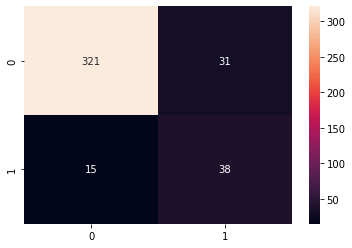

In [200]:
print('Confusion Matrix - Test Set :')
conf_matrix = confusion_matrix(y_test, rf_final.predict(X_test_scaled))
sns.heatmap(conf_matrix, annot=True, fmt="d")

Terlihat dari confusion matrix bahwa hasil prediksi bisa diatas 50% pada data yang imbalance, saya rasa sudah cukup bagus karena data yang imbalance sekitar 75-80%

# 9 - Model Saving

In [201]:
# Membuat pipeline
pipeline = make_pipeline(MinMaxScaler(),
                         RandomForestClassifier(criterion= 'entropy', max_features= 'auto', min_samples_leaf= 1,
                        min_samples_split= 2, n_estimators= 100, random_state=17))

pipeline.fit(X_train_scaled, y_train_imbalanced)

Pipeline(steps=[('minmaxscaler', MinMaxScaler()),
                ('randomforestclassifier',
                 RandomForestClassifier(criterion='entropy', random_state=17))])

In [202]:
y_pred = pipeline.predict(X_test_scaled)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.93      0.98      0.95       352
           1       0.77      0.51      0.61        53

    accuracy                           0.92       405
   macro avg       0.85      0.74      0.78       405
weighted avg       0.91      0.92      0.91       405



In [203]:
# Menyimpan Model
with open("wine_quality.pkl", "wb") as f:
  pickle.dump(pipeline, f)

# 9 - Model Inference

In [204]:
# Feature Scaling and Feature Encoding
df_inf_t = df_inf.drop('quality', axis=1)
data_inf_scaled = scaler.transform(df_inf_t)

In [208]:
data_inf_final_df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'chlorides', 'pH',
       'sulphates', 'alcohol'],
      dtype='object')

In [205]:
data_inf_final_df = pd.DataFrame(data_inf_scaled, columns=df_inf_t.columns)
data_inf_final_df

,fixed acidity,volatile acidity,citric acid,chlorides,pH,sulphates,alcohol
0,0.416667,0.792135,0.307692,0.148026,0.581081,0.666667,0.460000
1,0.347222,0.337079,0.320513,0.213816,0.283784,0.363636,0.140000
2,0.902778,0.398876,0.512821,0.171053,0.175676,0.484848,0.326667
3,0.069444,0.426966,0.115385,0.032895,0.932432,0.454545,0.920000
4,0.486111,0.393258,0.602564,0.115132,0.189189,0.196970,0.220000
5,0.402778,0.528090,0.205128,0.085526,0.648649,0.893939,0.420000
6,0.250000,0.696629,0.038462,0.049342,0.689189,0.454545,0.620000
7,0.361111,0.994382,0.192308,0.207237,0.391892,0.227273,0.320000
8,0.027778,0.505618,0.012821,0.049342,0.851351,0.772727,0.820000
9,0.625000,0.235955,0.666667,0.115132,0.567568,0.651515,0.800000


In [206]:
# predict inference set
model_rf.fit(X_train_scaled, y_train_imbalanced)
y_pred_inf = model_rf.predict(data_inf_final_df)
y_pred_inf_df = pd.DataFrame(y_pred_inf,columns=['Predict Quality'])
y_pred_inf_df

,Predict Quality
0,0
1,0
2,0
3,0
4,0
5,0
6,0
7,0
8,1
9,1


In [210]:
# Concat Inference-Set with Prediction

df_predict = pd.concat([df_inf, y_pred_inf_df], axis=1)
df_predict


,fixed acidity,volatile acidity,citric acid,chlorides,pH,sulphates,alcohol,quality,Predict Quality
0,8.1,0.825,0.24,0.084,3.37,0.77,10.700000,0,0
1,7.6,0.420,0.25,0.104,3.15,0.57,9.100000,0,0
2,11.6,0.475,0.40,0.091,3.07,0.65,10.033333,0,0
3,5.6,0.500,0.09,0.049,3.63,0.63,13.000000,0,0
4,8.6,0.470,0.47,0.074,3.08,0.46,9.500000,0,0
5,8.0,0.590,0.16,0.065,3.42,0.92,10.500000,1,0
6,6.9,0.740,0.03,0.054,3.45,0.63,11.500000,0,0
7,7.7,1.005,0.15,0.102,3.23,0.48,10.000000,0,0
8,5.3,0.570,0.01,0.054,3.57,0.84,12.500000,1,1
9,9.6,0.330,0.52,0.074,3.36,0.76,12.400000,1,1


Terlihat model cukup bagus untuk memprediksi hasil data yang imbalance, terlihat dari 10 sampel data hanya ada 1 kesalahan yang terjadi

# 10 - Pengambilan Kesimpulan

Kesimpulan yang didapat dari pengerjaan Feature Engineering kali ini adalah melakukan trial dan error terhadap dataset yang digunakan, mulai dari mengeliminasi fitur yang tidak diperlukan dengan hasil data yang didapat, mengimplementasikan feature selection, feature scalling, sampai mendapatkan model yang bagus dengan error yang kecil atau akurasi yang tinggi menggunakan hyperparamater tuning.\
Hasil yang didapatkan kali ini adalah:
- Mengeliminasi fitur yang tidak dibutuhkan
- Melakukan scaling data menggunakan MinMaxScaler
- Melakukan perbandingan dengan handling imbalance dataset, ternyata tidak ada perbedaan dari hasil data
- Melakukan trial & error hyperparamater tuning untuk mendapatkan hasil terbaik
- Mendapatkan hasil menggunakan model Tuning Random Forest senilai 89%
- Mendapatkan prediksi kualitas wine menggunakan model Random Forest